**Task:1**

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/column_2C_weka.csv')
#print(df)
X=np.array(df.iloc[:,:-1])
Y=np.array(df.iloc[:,-1])
#print(df)
# print(X)
# print(y)
print(df.head())
df.info()
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**Task:2**

In [ ]:
# For data creation and other tasks
import numpy as np
import random
import pandas as pd
import math
## Mertics to evaluate the models
from sklearn . metrics import accuracy_score # for Logistic Regression
# For plotting the graphs ..
import matplotlib . pyplot as plt
%matplotlib inline
import seaborn as sns
# For spliting the data into 80:20 ratio
from sklearn . model_selection import train_test_split

**Task:3**

In [ ]:
def weightInitialization ( n_features ):
  w = np.zeros((n_features, 1))
  b = 0
  return w,b

**Task:4**

In [ ]:
def sigmoid_activation(z):
    Y = 1 / (1 + np.exp(-z))
    return Y


**Task:5**

In [ ]:
def model_optimize(w, b, X, Y):
    m = X.shape[1]
    Y=Y.reshape(len(Y),1)

    z = np.dot(X,w) + b
    A = sigmoid_activation(z)

    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    dz = A - Y

    dw = 1/m * np.dot(X.T,dz)

    db = 1/m * np.sum(dz)

    grads = {"dw": dw, "db": db}

    return grads, cost

**Task:6**

In [ ]:
def model_fit(w, b, X, Y, learning_rate, no_iterations):
    costs = []

    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]


        w = w - (learning_rate * dw)

        b = b - (learning_rate * db)

        if (i % 10 == 0):
            costs.append(cost)
    coeff = {"w": w, "b": b}

    return coeff, costs

**Text:7**

In [ ]:
Y = (Y == "Abnormal")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


w, b = weightInitialization(X_train.shape[1])

coeff, costs = model_fit(w, b, X_train, Y_train, learning_rate=0.000001, no_iterations=1000)

w_final = coeff["w"]
b_final = coeff["b"]


def predict(X, w, b):
    z = np.dot(X, w) + b
    A = sigmoid_activation(z)
    return (A >= 0.5).astype(int)

Y_pred = predict(X_test, w_final, b_final)
Y_test = Y_test.astype(int)
Y_pred = Y_pred.astype(int)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 83.87096774193549 %


**Task:8**

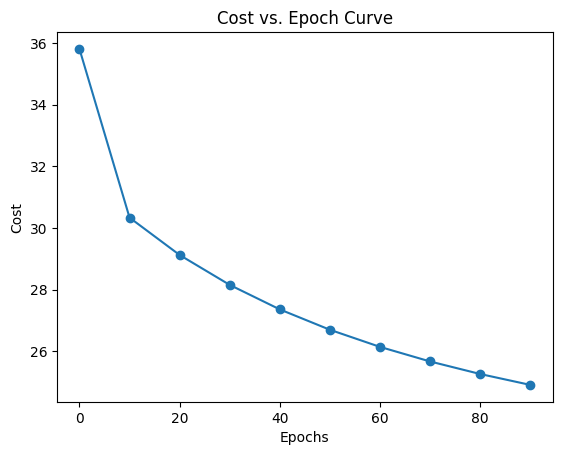

In [ ]:
n_features = X.shape[1]
w, b = weightInitialization(n_features)

learning_rate = 0.000001
no_iterations = 100

coeff, costs = model_fit(w, b, X, Y, learning_rate, no_iterations)

plt.plot(range(0, no_iterations, 10), costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch Curve')
plt.show()

**Task:9**

In [ ]:
def train_and_evaluate(X, Y, train_percentage):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-train_percentage, random_state=42)
    n_features = X_train.shape[1]
    w, b = weightInitialization(n_features)
    learning_rate = 0.000001
    no_iterations = 100

    coeff, _ = model_fit(w, b, X_train, Y_train, learning_rate, no_iterations)

    z = np.dot(X_test, coeff["w"]) + coeff["b"]
    predictions = sigmoid_activation(z)
    predictions = (predictions > 0.5).astype(int)

    accuracy = accuracy_score(Y_test, predictions)

    return accuracy
training_percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

accuracies = []
for percentage in training_percentages:
    accuracy = train_and_evaluate(X, Y, percentage)
    accuracies.append(accuracy)

for i, percentage in enumerate(training_percentages):
    print(f"Accuracy using {percentage*100}% of training data: {accuracies[i]*100}%")

Accuracy using 10.0% of training data: 67.38351254480287%
Accuracy using 20.0% of training data: 67.74193548387096%
Accuracy using 30.0% of training data: 69.12442396313364%
Accuracy using 40.0% of training data: 70.96774193548387%
Accuracy using 50.0% of training data: 70.96774193548387%
Accuracy using 60.0% of training data: 75.0%
Accuracy using 70.0% of training data: 76.59574468085107%
Accuracy using 80.0% of training data: 70.96774193548387%
Accuracy using 90.0% of training data: 83.87096774193549%


**Task:10**

In [ ]:
def model_optimize_with_regularization(w, b, X, Y, reg=None, lambda_val=0.1):
    m = X.shape[1]
    Y = Y.reshape(len(Y), 1)
    z = np.dot(X, w) + b
    A = sigmoid_activation(z)

    if reg == "L1":
        reg_term = (lambda_val / (2 * m)) * np.sum(np.abs(w))
    elif reg == "L2":
        reg_term = (lambda_val / (2 * m)) * np.sum(w**2)
    else:
        reg_term = 0

    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + reg_term
    dz = A - Y
    dw = 1/m * np.dot(X.T, dz)
    db = 1/m * np.sum(dz)

    if reg == "L1":
        dw += (lambda_val / m) * np.sign(w)
    elif reg == "L2":
        dw += (lambda_val / m) * w

    grads = {"dw": dw, "db": db}

    return grads, cost

**Task:11**

In [ ]:
def train_with_regularization(X_train, Y_train, X_test, Y_test, epochs, reg_options, reg_coefficients):
    results = []

    for reg_option in reg_options:
        for reg_coefficient in reg_coefficients:
            w, b = weightInitialization(X_train.shape[1])
            grads, _ = model_optimize_with_regularization(w, b, X_train, Y_train, reg=reg_option, lambda_val=reg_coefficient)

            w = grads["dw"]
            b = grads["db"]
            z = np.dot(X_test, w) + b
            predictions = sigmoid_activation(z)
            predictions = (predictions > 0.5).astype(int)

            accuracy = accuracy_score(Y_test, predictions)

            results.append([reg_option, reg_coefficient, accuracy])

    return results

reg_options = [None, "L1", "L2"]
reg_coefficients = [0.01, 0.1, 1]

results = train_with_regularization(X_train, Y_train, X_test, Y_test, epochs=100, reg_options=reg_options, reg_coefficients=reg_coefficients)

results_df = pd.DataFrame(results, columns=['Regularization', 'Lambda', 'Test Accuracy'])
print(results_df)


  Regularization  Lambda  Test Accuracy
0           None    0.01       0.258065
1           None    0.10       0.258065
2           None    1.00       0.258065
3             L1    0.01       0.258065
4             L1    0.10       0.258065
5             L1    1.00       0.258065
6             L2    0.01       0.258065
7             L2    0.10       0.258065
8             L2    1.00       0.258065


<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))
<ipython-input-276-3bd92199aa85>:2: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-z))


**Task:12**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, Y_train)

predictions = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print(f"Accuracy using Logistic Regression model: {accuracy*100:.2f}%")

Accuracy using Logistic Regression model: 88.17%


**Task:13**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, Y_train)

predictions = decision_tree_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print(f"Accuracy using Decision Tree model: {accuracy*100:.2f}%")

Accuracy using Decision Tree model: 80.65%


**Task:14**

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, Y_train)

predictions = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print(f"Accuracy using Naive Bayes model: {accuracy*100:.2f}%")

Accuracy using Naive Bayes model: 79.57%
